In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.path as mpath
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import numpy as np
import pandas as pd
import cmocean
import utm

In [116]:
def draw_globalcustom(X,Y,Z,cmap,cbar_label,title,plot_type,**kwargs):
    
    crs_plot = ccrs.Robinson(central_longitude=-150)
    crs_source = ccrs.PlateCarree()
    
    fig,ax = plt.subplots(figsize=(14,14),subplot_kw={'projection':crs_plot})
    ax.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
#     ax.set_extent([-360, 360, -80, 80], crs_source)
    
    ax.gridlines()
    ax.coastlines()
    
    ax.set_title(title,fontsize=14,pad = 20)
    
    if plot_type == 'contourf':
        im = ax.contourf(X,Y,Z,kwargs['clevs'],cmap=cmap,transform=crs_source)
    elif plot_type == 'pcolormesh':
        im = ax.pcolormesh(X,Y,Z,cmap=cmap,transform=crs_source,vmin=kwargs['clims'][0],vmax=kwargs['clims'][1])
    
    cbar = plt.colorbar(im,orientation='horizontal',fraction=0.025,pad=0.05)
    cbar.set_label(cbar_label,fontsize=12)
    
#     plt.show()
    
    return fig,ax

In [61]:
from dask.diagnostics import ProgressBar

In [63]:
rootdir = '/local/data/jra55/'
ds = xr.open_dataset(rootdir+'jra55_surface_flux_monthly_197901-201912.nc')
# with ProgressBar():
#     ds.load()

In [49]:
def calc_F(FW,Q,S=35,alpha=0.15E-3,beta=0.75E-3,Cp=4200):
    
    Fheat = (alpha/Cp)*Q
    Ffw = -FW*S*beta
    F = Fheat+Ffw
    
    F.name = 'F'
    Fheat.name = 'Fheat'
    Ffw.name = 'Ffw'
    
    return F, Fheat, Ffw

In [108]:
# Calculate density flux
FW = (ds['EVP_GDS4_SFC_S130']-ds['TPRAT_GDS4_SFC_S130'])*(1/(1000*86400))
Q = -ds['LHTFL_GDS4_SFC_S130']-ds['SHTFL_GDS4_SFC_S130']+(ds['DSWRF_GDS4_SFC_S130']-ds['USWRF_GDS4_SFC_S130'])+(ds['DLWRF_GDS4_SFC_S130']-ds['ULWRF_GDS4_SFC_S130'])

# F,Fheat,Ffw = calc_F(FW,Q)
# Fheat_now = Fheat.mean('time')
# Ffw_now = Ffw.mean('time')
# F_now = F.mean('time')

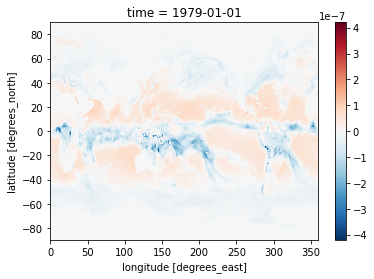

In [125]:
((ds['EVP_GDS4_SFC_S130']-ds['TPRAT_GDS4_SFC_S130'])/(1000*86400)).isel(time=0).plot()

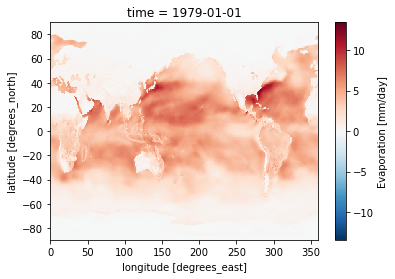

In [123]:
ds['EVP_GDS4_SFC_S130'].isel(time=0).plot()

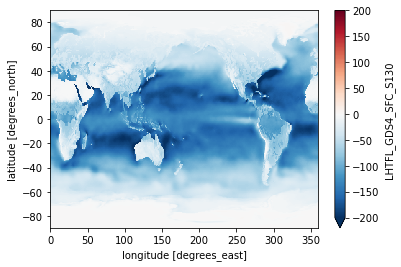

In [104]:
(-1*ds['LHTFL_GDS4_SFC_S130']).isel(time=slice(0,12)).mean('time').plot(cmap='RdBu_r',vmin=-200,vmax=200)

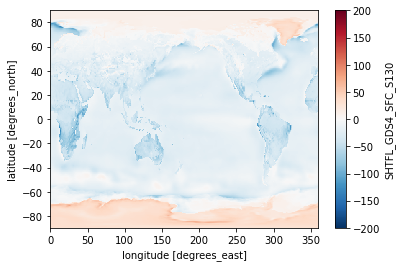

In [105]:
(-1*ds['SHTFL_GDS4_SFC_S130']).isel(time=slice(0,12)).mean('time').plot(cmap='RdBu_r',vmin=-200,vmax=200)

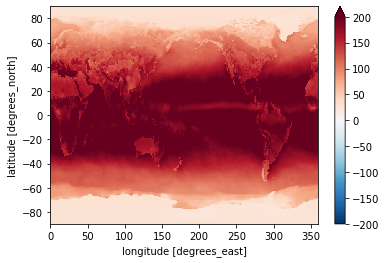

In [106]:
(ds['DSWRF_GDS4_SFC_S130']-ds['USWRF_GDS4_SFC_S130']).isel(time=slice(0,12)).mean('time').plot(cmap='RdBu_r',vmin=-200,vmax=200)

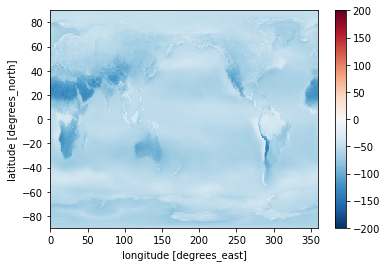

In [107]:
(ds['DLWRF_GDS4_SFC_S130']-ds['ULWRF_GDS4_SFC_S130']).isel(time=slice(0,12)).mean('time').plot(cmap='RdBu_r',vmin=-200,vmax=200)

In [109]:
with ProgressBar():
    Q.load()
    FW.load()

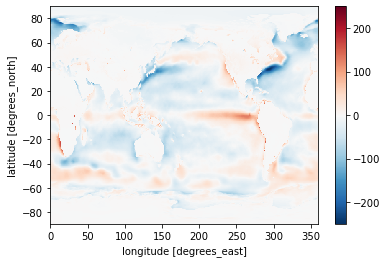

In [110]:
Q.isel(time=slice(0,12)).mean('time').plot()

In [111]:
F,Fheat,Ffw = calc_F(FW,Q)

(<Figure size 1008x1008 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Buoyancy flux  \n [Positive into the ocean]'}>)

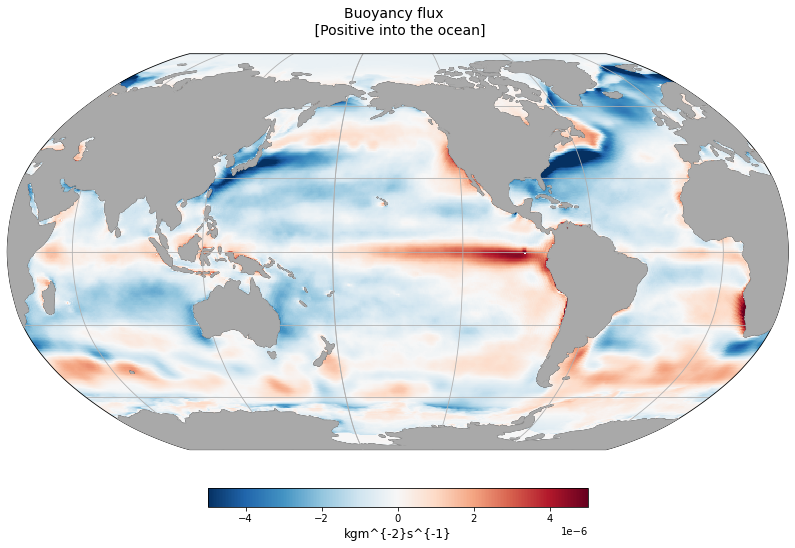

In [117]:
X = ds['g4_lon_1']
Y = ds['g4_lat_0']
Z = F.isel(time=slice(0,12)).mean('time')
cmap = 'RdBu_r'
cbar_label='$kgm^{-2}s^{-1}$'
title = 'Buoyancy flux  \n [Positive into the ocean]'
plot_type='pcolormesh'

draw_globalcustom(X,Y,Z,cmap,cbar_label,title,plot_type,clims=[-0.5E-5,0.5E-5])

(<Figure size 1008x1008 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Buoyancy flux  \n [Positive into the ocean]'}>)

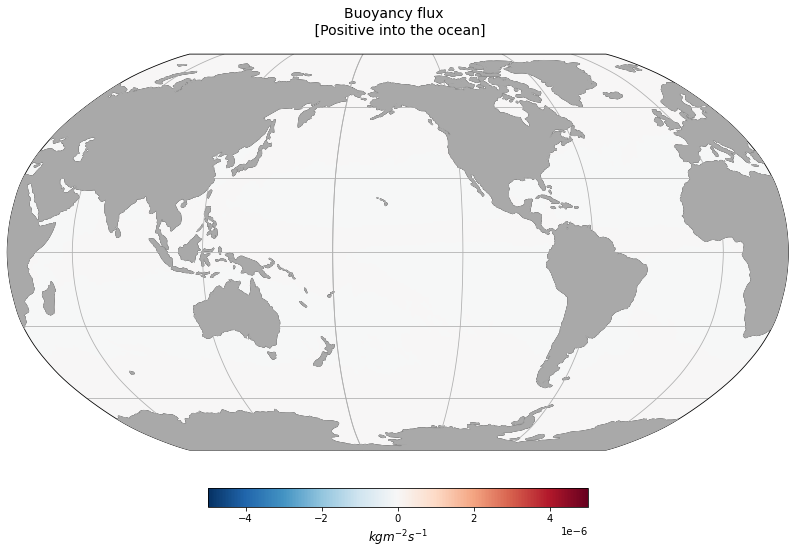

In [119]:
X = ds['g4_lon_1']
Y = ds['g4_lat_0']
Z = Ffw.isel(time=slice(0,12)).mean('time')
cmap = 'RdBu_r'
cbar_label='$kgm^{-2}s^{-1}$'
title = 'Buoyancy flux  \n [Positive into the ocean]'
plot_type='pcolormesh'

draw_globalcustom(X,Y,Z,cmap,cbar_label,title,plot_type,clims=[-0.5E-5,0.5E-5])